In [69]:
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import DBAdapters
from pyevolve import G1DList
import math
import random

In [70]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
        17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
        96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]


class City:
    """
    Represent a City
    """
    
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon
    
    def distance(self, city2):
        """
        Calculates the distance between the current city and city2 using
        the Haversine formula 
        """
        lat1, lon1 = (self.lat, self.lon)
        lat2, lon2 = (city2.lat, city2.lon)
        radius = 6371 # km
        
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return radius * c
    
    
    def __repr__(self):
        return "{" + str(self.lat) + " " + str(self.lon) + "}"
    
def travel(cities):
    """
    Compute the total travel to visit each city
    """
    
    # score
    travel = 0.0
    n = len(cities)
    
    for i in xrange(0, n - 1):
        # Distance between city_i and city_i+1
        travel += cities[i].distance(cities[i + 1])

    # add distance between the first and the last city
    travel += cities[0].distance(cities[n - 1])
    return travel


def fitness(chromosome):    
    """
     Minimize the total travel distance 
    """
    chromosomeCities = map(lambda i: City(LAT[i], LON[i]), chromosome)
    return 10000 - travel(chromosomeCities)

In [71]:
def G1DListTSPInitializator(genome, **args):
    """ The initializator for the genome """

    newGenomeInternal = [i for i in xrange(genome.getListSize())]
    random.shuffle(newGenomeInternal)
    genome.setInternalList(newGenomeInternal)

# Chromosome representation
genome = G1DList.G1DList(len(LON))

# genome = bitstring
genome.initializator.set(G1DListTSPInitializator)
genome.setParams(rangemin=0, rangemax=len(LON)-1)

# Compute the fitness (the travel)
genome.evaluator.set(fitness)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome, seed=123)
ga.setPopulationSize(100)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.0) # we remove the crossover, we must visit each city
ga.selector.set(Selectors.GTournamentSelector)
ga.setElitism(True)

sqlite_adapter = DBAdapters.DBSQLite(identify="TheTravelingSalesmanProblem")
ga.setDBAdapter(sqlite_adapter)

# Number of generations
ga.setGenerations(200)

# In case we want to monitor the evolution process
# execute the function current_best every generation
# ga.stepCallback.set(current_best)
ga.evolve(freq_stats=10)

# Final best solution
print ga.bestIndividual()

# Calculate the total distance
bestIndividual = ga.bestIndividual()
cities = map(lambda i: City(LAT[i], LON[i]), bestIndividual)
print "total distance", travel(cities)

Gen. 0 (0.00%):

 Max/Min/Avg Fitness(Raw) [3910.89(5598.45)/2632.54(1010.45)/3259.07(3259.07)]
Gen. 10 (5.00%):

 Max/Min/Avg Fitness(Raw) [6870.07(5891.34)/0.00(3906.57)/5845.66(5725.06)]
Gen. 20 (10.00%):

 Max/Min/Avg Fitness(Raw) [7189.70(6119.48)/0.00(3807.73)/6376.97(5991.42)]


Gen. 30 (15.00%):

 Max/Min/Avg Fitness(Raw) [7316.94(6424.96)/0.00(4069.59)/6125.04(6097.45)]


Gen. 40 (20.00%):

 Max/Min/Avg Fitness(Raw) [7639.84(6509.76)/0.00(4656.54)/6506.57(6366.54)]


Gen. 50 (25.00%):

 Max/Min/Avg Fitness(Raw) [7754.75(6570.45)/0.00(4388.47)/6815.48(6462.29)]


Gen. 60 (30.00%):

 Max/Min/Avg Fitness(Raw) [7755.07(6590.84)/0.00(4465.53)/6875.01(6462.56)]


Gen. 70 (35.00%):

 Max/Min/Avg Fitness(Raw) [7836.56(6590.84)/0.00(4436.81)/7363.49(6530.47)]


Gen. 80 (40.00%):

 Max/Min/Avg Fitness(Raw) [7698.59(6590.84)/0.00(4386.24)/6860.84(6415.49)]


Gen. 90 (45.00%):

 Max/Min/Avg Fitness(Raw) [7906.66(6645.48)/0.00(4562.69)/7350.80(6588.89)]


Gen. 100 (50.00%):

 Max/Min/Avg Fitness(Raw) [7756.99(6645.48)/0.00(4157.10)/6860.30(6464.16)]


Gen. 110 (55.00%):

 Max/Min/Avg Fitness(Raw) [7888.62(6645.48)/0.00(5302.27)/7183.73(6573.85)]


Gen. 120 (60.00%):

 Max/Min/Avg Fitness(Raw) [7811.80(6645.48)/0.00(4401.88)/6995.71(6509.83)]


Gen. 130 (65.00%):

 Max/Min/Avg Fitness(Raw) [7784.95(6645.48)/0.00(4455.95)/6963.62(6487.46)]


Gen. 140 (70.00%):

 Max/Min/Avg Fitness(Raw) [7921.18(6645.48)/0.00(5126.29)/7434.51(6600.98)]


Gen. 150 (75.00%):

 Max/Min/Avg Fitness(Raw) [7800.41(6645.48)/0.00(4320.79)/6979.79(6500.34)]


Gen. 160 (80.00%):

 Max/Min/Avg Fitness(Raw) [7740.47(6645.48)/0.00(4157.10)/6834.30(6450.39)]


Gen. 170 (85.00%):

 Max/Min/Avg Fitness(Raw) [7762.06(6645.48)/0.00(4320.79)/6901.14(6468.38)]


Gen. 180 (90.00%):

 Max/Min/Avg Fitness(Raw) [7841.41(6645.48)/0.00(4401.88)/7208.92(6534.51)]


Gen. 190 (95.00%):

 Max/Min/Avg Fitness(Raw) [7740.30(6645.48)/0.00(3720.46)/6734.48(6450.25)]


Gen. 200 (100.00%):

 Max/Min/Avg Fitness(Raw) [7846.25(6645.48)/0.00(4524.84)/7040.68(6538.54)]
Total time elapsed: 1.567 seconds.
- GenomeBase
	Score:			 6645.476863
	Fitness:		 7846.251377

	Params:		 {'rangemax': 13, 'rangemin': 0}

	Slot [Evaluator] (Count: 1)
		Name: fitness - Weight: 0.50
		Doc: 
     Minimize the total travel distance 
    
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
		Doc:  The initializator for the genome 
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator
   
   .. note:: this mutator is :term:`Data Type Independent`

   
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverSinglePoint - Weight: 0.50
		Doc:  The crossover of G1DList, Single Point

   .. warning:: You can't use this crossover method for lists with just one element.

   

- G1DList
	List size:	 14
	List:		 [10, 8, 9, 0, 1, 13, 2, 3, 4, 5, 11, 6, 12, 7]


total distance 3354.52313748


Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
200 generations found !


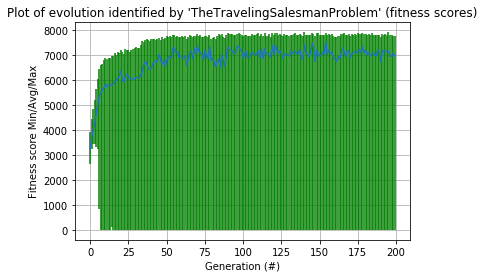

In [72]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ~/anaconda/bin/pyevolve_graph.py -i TheTravelingSalesmanProblem -2

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...


200 generations found !


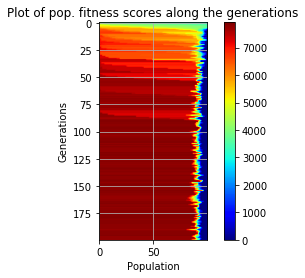

In [73]:
# Generate a heatmap of population fitness score distribution over generations
%run ~/anaconda/bin/pyevolve_graph.py -i TheTravelingSalesmanProblem -9